<a href="https://colab.research.google.com/github/shabbu8111999/Deep-Learning-Projects/blob/main/Credit_Card_Fraud_Detection_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/fraudTrain.csv", on_bad_lines='skip')

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [ ]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
# Dropping Unwanted Columns

df.drop(columns = ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant',
                   'first', 'last', 'street', 'city', 'zip', 'lat', 'long', 'dob',
                   'trans_num', 'unix_time', 'merch_lat', 'merch_long'], inplace = True)

In [ ]:
df.head()

,category,amt,gender,state,city_pop,job,is_fraud
0,misc_net,4.97,F,NC,3495.0,"Psychologist, counselling",0.0
1,grocery_pos,107.23,F,WA,149.0,Special educational needs teacher,0.0
2,entertainment,220.11,M,ID,4154.0,Nature conservation officer,0.0
3,gas_transport,45.00,M,MT,1939.0,Patent attorney,0.0
4,misc_pos,41.96,M,VA,99.0,Dance movement psychotherapist,0.0


In [ ]:
df.isnull().sum()

,0
category,0
amt,0
gender,0
state,1
city_pop,1
job,1
is_fraud,1


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isna().sum()

,0
category,0
amt,0
gender,0
state,0
city_pop,0
job,0
is_fraud,0


# Converting Categorical Values to Numerical format

In [ ]:
df['category'].unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

In [ ]:
# Using One Hot Encoding
category_df = (pd.get_dummies(df['category'])).astype(int) # if not used "INT" then the values will be in Boolean Format

In [ ]:
category_df

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31145,0,1,0,0,0,0,0,0,0,0,0,0,0,0
31146,0,1,0,0,0,0,0,0,0,0,0,0,0,0
31147,0,0,0,0,0,1,0,0,0,0,0,0,0,0
31148,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
df.drop(columns = ['category'], inplace = True)

In [ ]:
df.head()

,amt,gender,state,city_pop,job,is_fraud
0,4.97,F,NC,3495.0,"Psychologist, counselling",0.0
1,107.23,F,WA,149.0,Special educational needs teacher,0.0
2,220.11,M,ID,4154.0,Nature conservation officer,0.0
3,45.00,M,MT,1939.0,Patent attorney,0.0
4,41.96,M,VA,99.0,Dance movement psychotherapist,0.0


In [ ]:
# Creating new dataframe to concat "category_df" with previous one.
df = pd.concat([df, category_df], axis = 1)

In [ ]:
df

,amt,gender,state,city_pop,job,is_fraud,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,4.97,F,NC,3495.0,"Psychologist, counselling",0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,107.23,F,WA,149.0,Special educational needs teacher,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,220.11,M,ID,4154.0,Nature conservation officer,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,45.00,M,MT,1939.0,Patent attorney,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,41.96,M,VA,99.0,Dance movement psychotherapist,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31145,16.59,F,WY,241.0,Educational psychologist,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
31146,166.48,F,TX,2526.0,Phytotherapist,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
31147,1.15,F,NE,73.0,Product designer,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
31148,72.92,M,KY,467.0,"Psychologist, forensic",0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
df['gender'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
df['gender'].replace({
    'M' : 1,
    'F' : 0
}, inplace = True)

In [ ]:
## THIS IS FOR IN-BUILT FUTURE UPDATION TO STOP IGNORE THIS ONE
pd.set_option('future.no_silent_downcasting', True)

In [ ]:
df['gender'].unique()

array([0, 1])

In [ ]:
df['state'].unique()

array(['NC', 'WA', 'ID', 'MT', 'VA', 'PA', 'KS', 'TN', 'IA', 'WV', 'FL',
       'CA', 'NM', 'NJ', 'OK', 'IN', 'MA', 'TX', 'WI', 'MI', 'WY', 'HI',
       'NE', 'OR', 'LA', 'DC', 'KY', 'NY', 'MS', 'UT', 'AL', 'AR', 'MD',
       'GA', 'ME', 'AZ', 'MN', 'OH', 'CO', 'VT', 'MO', 'SC', 'NV', 'IL',
       'NH', 'SD', 'AK', 'ND', 'CT', 'RI'], dtype=object)

In [ ]:
state_df = (pd.get_dummies(df['state'])).astype(int)

In [ ]:
state_df.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# Dropping Original DataFrame State Column
df.drop(columns = ['state'], inplace = True)

In [ ]:
df.head()

,amt,gender,city_pop,job,is_fraud,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,4.97,0,3495.0,"Psychologist, counselling",0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,107.23,0,149.0,Special educational needs teacher,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,220.11,1,4154.0,Nature conservation officer,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,45.00,1,1939.0,Patent attorney,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,41.96,1,99.0,Dance movement psychotherapist,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Creating new dataframe to concat "state_df" with previous one.
df = pd.concat([df, state_df], axis = 1)

In [ ]:
df.head()

,amt,gender,city_pop,job,is_fraud,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,4.97,0,3495.0,"Psychologist, counselling",0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,107.23,0,149.0,Special educational needs teacher,0.0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,220.11,1,4154.0,Nature conservation officer,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,45.00,1,1939.0,Patent attorney,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,41.96,1,99.0,Dance movement psychotherapist,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
df['job'].unique().shape

(475,)

In [ ]:
job_df = (pd.get_dummies(df['job'])).astype(int)

In [ ]:
job_df.head()

,Academic librarian,"Accountant, chartered certified","Accountant, chartered public finance",Accounting technician,Acupuncturist,Administrator,"Administrator, arts","Administrator, charities/voluntary organisations","Administrator, education","Administrator, local government",...,Video editor,Visual merchandiser,Volunteer coordinator,Warden/ranger,Waste management officer,Water engineer,Water quality scientist,Web designer,Wellsite geologist,Writer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.drop(columns = ['job'], inplace = True)

In [ ]:
df.head(2)

,amt,gender,city_pop,is_fraud,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,4.97,0,3495.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,107.23,0,149.0,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df = pd.concat([df, job_df], axis = 1)

In [ ]:
df.shape

(31150, 543)

In [ ]:
df.head()

,amt,gender,city_pop,is_fraud,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,...,Video editor,Visual merchandiser,Volunteer coordinator,Warden/ranger,Waste management officer,Water engineer,Water quality scientist,Web designer,Wellsite geologist,Writer
0,4.97,0,3495.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,107.23,0,149.0,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,220.11,1,4154.0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,45.00,1,1939.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,41.96,1,99.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Dividing The Dataset

In [ ]:
X = df.drop(columns = ['is_fraud'])
y = df['is_fraud']

In [ ]:
X.head()

,amt,gender,city_pop,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,...,Video editor,Visual merchandiser,Volunteer coordinator,Warden/ranger,Waste management officer,Water engineer,Water quality scientist,Web designer,Wellsite geologist,Writer
0,4.97,0,3495.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,107.23,0,149.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,220.11,1,4154.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,45.00,1,1939.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,41.96,1,99.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y.value_counts()

,count
is_fraud,
0.0,30841
1.0,309


It clearly indicate that the Traget Value is not Balanced and we need to fix this imbalanced data

# Handling the Imbalanced Dataset using "Smote" Technique

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
X, y = smote.fit_resample(X, y)

In [ ]:
y.value_counts()

,count
is_fraud,
0.0,30841
1.0,30841


In [ ]:
X.shape # SMOTE Resampling technique will also Double the Rows were there is no sampling Required

(61682, 542)

# Data Normalization

In [ ]:
X.describe()

,amt,gender,city_pop,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,...,Video editor,Visual merchandiser,Volunteer coordinator,Warden/ranger,Waste management officer,Water engineer,Water quality scientist,Web designer,Wellsite geologist,Writer
count,61682.000000,61682.000000,6.168200e+04,61682.000000,61682.000000,61682.000000,61682.000000,61682.000000,61682.000000,61682.000000,...,61682.000000,61682.000000,61682.000000,61682.000000,61682.000000,61682.000000,61682.000000,61682.000000,61682.000000,61682.000000
mean,284.909144,0.432622,9.485271e+04,0.038780,0.038277,0.064411,0.022373,0.157145,0.035148,0.049447,...,0.001443,0.000259,0.000892,0.001232,0.001167,0.002772,0.000211,0.001200,0.001038,0.000146
std,356.315939,0.495443,2.945597e+05,0.193071,0.191866,0.245486,0.147894,0.363940,0.184155,0.216802,...,0.037958,0.016104,0.029848,0.035080,0.034146,0.052580,0.014516,0.034616,0.032195,0.012079
min,1.000000,0.000000,2.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.613866,0.000000,8.850000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,90.215000,0.000000,2.290000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,350.708597,1.000000,1.618300e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11872.210000,1.000000,2.906700e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[:] = scaler.fit_transform(X)

In [ ]:
X.head()

,amt,gender,city_pop,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,...,Video editor,Visual merchandiser,Volunteer coordinator,Warden/ranger,Waste management officer,Water engineer,Water quality scientist,Web designer,Wellsite geologist,Writer
0,0.000334,0,0.001194,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.008949,0,0.000043,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.018457,1,0.001421,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.003706,1,0.000659,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.003450,1,0.000026,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Train Test Method

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                       random_state = 42, stratify = y) # Stratify will provide equal no. of values to both Training as well as Testing

In [ ]:
X_train.shape, X_test.shape

((49345, 542), (12337, 542))

In [ ]:
y_train.value_counts(), y_test.value_counts()

(is_fraud
 1.0    24673
 0.0    24672
 Name: count, dtype: int64,
 is_fraud
 0.0    6169
 1.0    6168
 Name: count, dtype: int64)

# Building The A.N.N

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.Sequential([
    # input layer + Hidden layer 1
    keras.layers.Dense(300, input_shape = (542,), activation = 'relu'),
    # Hidden Layer 2
    keras.layers.Dense(150, activation = 'relu'),
    # Output layer
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 10, batch_size = 200)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8939 - loss: 0.2531
Epoch 2/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9953 - loss: 0.0171
Epoch 3/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9963 - loss: 0.0136
Epoch 4/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9965 - loss: 0.0123
Epoch 5/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9971 - loss: 0.0107
Epoch 6/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9976 - loss: 0.0094
Epoch 7/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9975 - loss: 0.0096
Epoch 8/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9978 - loss: 0.0081
Epoch 9/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9975 - loss: 0.0081
Epoch 10/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9979 - loss: 0.0082


# Model Evaluation on Testing Set

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model Accuracy : {accuracy * 100}")

386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9973 - loss: 0.0109
Model Accuracy : 99.63524341583252


In [ ]:
# Info of our Model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 300)                 │         162,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 150)                 │          45,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             151 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 624,605 (2.38 MB)

 Trainable params: 208,201 (813.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 416,404 (1.59 MB)

# To Make Predictions

In [ ]:
pred = model.predict(X_test)

386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
pred[:5]

array([[2.8247537e-06],
       [1.9810586e-05],
       [7.6380138e-09],
       [4.3639498e-05],
       [7.1182244e-06]], dtype=float32)

In [ ]:
# We are giving a default threshold i.e. 0.5 so that we can easily view the predictions
binary_pred = ((pred > 0.5)).astype(int)

In [ ]:
binary_pred[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [ ]:
# Let's Compare with our Testing Set
result = pd.DataFrame({
    'Actual' : y_test,
    'Predicted' : binary_pred.reshape(-1)
})
result.head(10)

,Actual,Predicted
14911,0.0,0
28060,0.0,0
17866,0.0,0
21592,0.0,0
4752,0.0,0
53062,1.0,1
51288,1.0,1
21684,0.0,0
14094,0.0,0
44866,1.0,1


# Evaluating through Confusion Matrix and Classification Report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cr = classification_report(y_test, binary_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      6169
         1.0       0.99      1.00      1.00      6168

    accuracy                           1.00     12337
   macro avg       1.00      1.00      1.00     12337
weighted avg       1.00      1.00      1.00     12337



Text(50.722222222222214, 0.5, 'Actual')

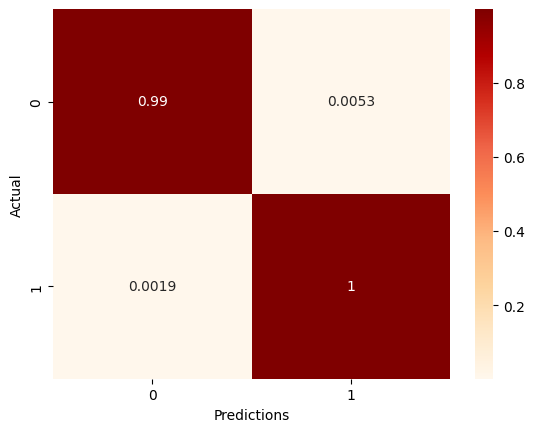

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cf = confusion_matrix(y_test, binary_pred, normalize = 'true')
sns.heatmap(cf, annot = True, cmap = 'OrRd')
plt.xlabel('Predictions')
plt.ylabel('Actual')